In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [183]:
# Load data
data = pd.read_csv('C:/Users/Ali Shady/CodeAlpha(internship)/TitanicClassfication/titanic.csv')

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [184]:
data.shape

(891, 12)

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [186]:
# check the number of missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

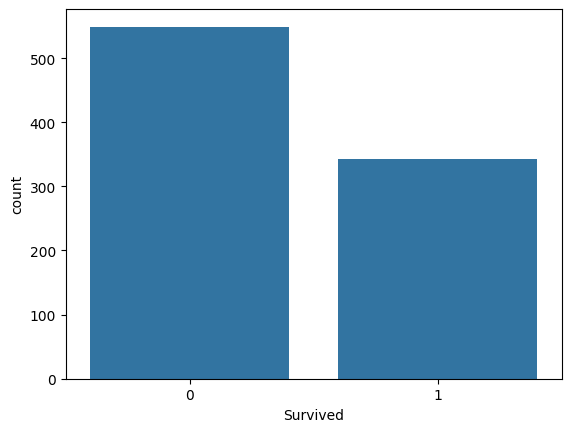

In [187]:
sns.countplot(x='Survived', data=data)


In [188]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

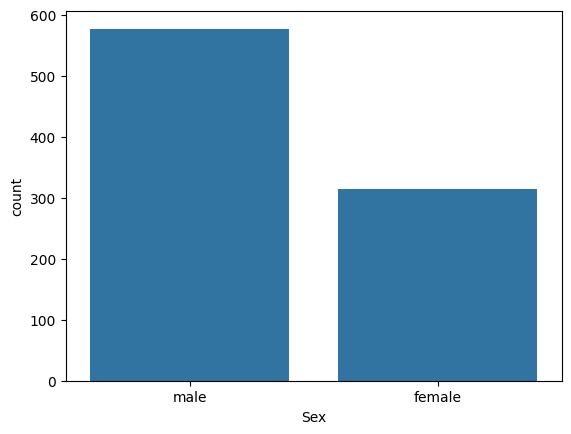

In [189]:
sns.countplot(x='Sex', data=data)

In [167]:
# Separate features and target variable
X = data.drop("Survived", axis=1)
y = data["Survived"]



In [168]:
features = ['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']

X = X[features]


In [169]:
# Handle categorical variables - convert 'Sex' to numerical values
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

In [171]:
# Handle categorical variables -
le = LabelEncoder()
X['Embarked'] = le.fit_transform(X['Embarked'])
# Use IterativeImputer for multivariate imputation of missing values
imputer = IterativeImputer(max_iter=10, random_state=0)
X= pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [172]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model Random Forest Classifier 
model = RandomForestClassifier(random_state=42)



In [173]:
# Train the model on the training set
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [174]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy on Test Set: {accuracy * 100:.2f}%')

Model Accuracy on Test Set: 84.36%


In [192]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[92 13]
 [15 59]]


In [193]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.82
Recall: 0.80
F1-Score: 0.81
